# ✅ Step-by-Step Plan
# 📍 Step 1: Understand and Prepare the Data
# Load the 2000+ binary sequences (each row = 1 sequence of 35 bits)

# Format: Likely a .csv, .txt, or .npy file

# Objective: For each row (pattern), predict the next 35-bit sequence

# 🔹STEP 1: Data Understanding & Preprocessing
# Please upload the dataset first (or paste a sample). Meanwhile, here's how this step will look.

In [ ]:
import pandas as pd

# Load the file
file_path = "/content/drive/MyDrive/Prediction Binary State Transitions in 35-Bit Patterns/binary_patterns.txt"

# Read and split each line by comma
with open(file_path, 'r') as file:
    lines = [line.strip() for line in file if line.strip()]
    bit_data = [[int(bit) for bit in line.split(',')] for line in lines]

# Convert to DataFrame
df = pd.DataFrame(bit_data)
df.columns = [f"Bit_{i+1}" for i in range(35)]

# Preview
print(df.head())
print(f"Total samples: {df.shape[0]} | Bit length: {df.shape[1]}")



   Bit_1  Bit_2  Bit_3  Bit_4  Bit_5  Bit_6  Bit_7  Bit_8  Bit_9  Bit_10  ...  \
0      0      1      1      0      0      0      0      0      0       0  ...   
1      0      1      1      0      0      1      0      1      0       0  ...   
2      0      1      1      0      0      1      0      1      0       0  ...   
3      0      1      1      0      0      0      0      0      0       0  ...   
4      0      1      1      0      0      1      0      0      0       0  ...   

   Bit_26  Bit_27  Bit_28  Bit_29  Bit_30  Bit_31  Bit_32  Bit_33  Bit_34  \
0       0       0       0       0       0       0       0       0       0   
1       0       0       0       0       0       0       0       0       0   
2       0       0       0       0       0       0       0       0       0   
3       0       0       1       0       0       0       0       0       0   
4       0       0       0       0       0       0       0       0       0   

   Bit_35  
0       0  
1       0  
2       0  
3 

# ✅ Step 2: Prepare Input-Output Pairs
# We’ll create:

# X = Current pattern (row 0 to 2236)

# y = Next pattern (row 1 to 2237)

# # This forms supervised input-output pairs for training.

In [ ]:
import numpy as np

X = df.iloc[:-1].values   # Row 0 to n-2
y = df.iloc[1:].values    # Row 1 to n-1

print(f"X shape: {X.shape}, y shape: {y.shape}")


X shape: (2237, 35), y shape: (2237, 35)


# ✅ Step 3: Logistic Regression Baseline
# # We’ll train 35 logistic regression models — one for each bit position — to predict the bit’s next state.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

bit_accuracies = []
models = []

# Split once (for all bits): use 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train one model per bit
for i in range(35):
    model = LogisticRegression()
    model.fit(X_train, y_train[:, i])  # Train on full pattern to predict bit i
    preds = model.predict(X_test)
    acc = accuracy_score(y_test[:, i], preds)

    models.append(model)
    bit_accuracies.append(acc)
    print(f"Bit_{i+1}: Accuracy = {acc:.4f}")

# Summary
print("\nAverage Accuracy across 35 bits:", np.mean(bit_accuracies))


Bit_1: Accuracy = 1.0000
Bit_2: Accuracy = 0.9420
Bit_3: Accuracy = 0.9018
Bit_4: Accuracy = 0.8817
Bit_5: Accuracy = 0.8013
Bit_6: Accuracy = 0.7991
Bit_7: Accuracy = 0.7790
Bit_8: Accuracy = 0.7746
Bit_9: Accuracy = 0.7790
Bit_10: Accuracy = 0.6295
Bit_11: Accuracy = 0.6384
Bit_12: Accuracy = 0.5804
Bit_13: Accuracy = 0.5402
Bit_14: Accuracy = 0.4866
Bit_15: Accuracy = 0.5402
Bit_16: Accuracy = 0.5781
Bit_17: Accuracy = 0.5670
Bit_18: Accuracy = 0.6049
Bit_19: Accuracy = 0.6317
Bit_20: Accuracy = 0.6518
Bit_21: Accuracy = 0.7277
Bit_22: Accuracy = 0.7321
Bit_23: Accuracy = 0.7746
Bit_24: Accuracy = 0.7321
Bit_25: Accuracy = 0.7790
Bit_26: Accuracy = 0.8036
Bit_27: Accuracy = 0.7812
Bit_28: Accuracy = 0.8147
Bit_29: Accuracy = 0.7879
Bit_30: Accuracy = 0.8438
Bit_31: Accuracy = 0.8304
Bit_32: Accuracy = 0.8929
Bit_33: Accuracy = 0.8259
Bit_34: Accuracy = 0.8549
Bit_35: Accuracy = 0.9129

Average Accuracy across 35 bits: 0.7485969387755101


✅ Step 4: Use a Deep Learning Model (Feedforward or LSTM)
We’ll now build a Neural Network (MLP) that:

Takes the full 35-bit pattern as input

Outputs the next 35-bit pattern

Learns cross-bit interactions and non-linear patterns

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import accuracy_score

# Create MLP model
model = Sequential([
    Dense(128, activation='relu', input_shape=(35,)),
    Dense(64, activation='relu'),
    Dense(35, activation='sigmoid')  # one output per bit
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train model
history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_split=0.1, verbose=1)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
51/51 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.2280 - loss: 0.6226 - val_accuracy: 0.9944 - val_loss: 0.5194
Epoch 2/30
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9932 - loss: 0.5177 - val_accuracy: 0.9944 - val_loss: 0.5160
Epoch 3/30
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9873 - loss: 0.5101 - val_accuracy: 0.9944 - val_loss: 0.5152
Epoch 4/30
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9912 - loss: 0.5106 - val_accuracy: 1.0000 - val_loss: 0.5138
Epoch 5/30
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9905 - loss: 0.5100 - val_accuracy: 1.0000 - val_loss: 0.5139
Epoch 6/30
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9899 - loss: 0.5063 - val_accuracy: 0.9944 - val_loss: 0.5141
Epoch 7/30
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9841 - loss: 0.5027 - val_accuracy: 0.9777 - val_loss: 0.5139
Epoch 8/30
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9629 - loss: 0.5036 - val_accuracy: 0.9665 - val_loss:

In [ ]:
# Evaluate Accuracy Per Bit

# Predict

y_pred = model.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int)

# Accuracy per bit
bit_accuracies_nn = [accuracy_score(y_test[:, i], y_pred_binary[:, i]) for i in range(35)]

# Print results
for i, acc in enumerate(bit_accuracies_nn):
    print(f"Bit_{i+1}: Accuracy = {acc:.4f}")

print("\nAverage Accuracy across 35 bits:", np.mean(bit_accuracies_nn))


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Bit_1: Accuracy = 1.0000
Bit_2: Accuracy = 0.9420
Bit_3: Accuracy = 0.9018
Bit_4: Accuracy = 0.8795
Bit_5: Accuracy = 0.7902
Bit_6: Accuracy = 0.7879
Bit_7: Accuracy = 0.7812
Bit_8: Accuracy = 0.7701
Bit_9: Accuracy = 0.7812
Bit_10: Accuracy = 0.6384
Bit_11: Accuracy = 0.6183
Bit_12: Accuracy = 0.6027
Bit_13: Accuracy = 0.5491
Bit_14: Accuracy = 0.5112
Bit_15: Accuracy = 0.5491
Bit_16: Accuracy = 0.5558
Bit_17: Accuracy = 0.5112
Bit_18: Accuracy = 0.5714
Bit_19: Accuracy = 0.6027
Bit_20: Accuracy = 0.6272
Bit_21: Accuracy = 0.7098
Bit_22: Accuracy = 0.7277
Bit_23: Accuracy = 0.7679
Bit_24: Accuracy = 0.7366
Bit_25: Accuracy = 0.7790
Bit_26: Accuracy = 0.8036
Bit_27: Accuracy = 0.7812
Bit_28: Accuracy = 0.8147
Bit_29: Accuracy = 0.7879
Bit_30: Accuracy = 0.8438
Bit_31: Accuracy = 0.8304
Bit_32: Accuracy = 0.8929
Bit_33: Accuracy = 0.8259
Bit_34: Accuracy = 0.8549
Bit_35: Accuracy = 0.9129

Average Accuracy across 35 bits: 0.7440051020408164


# ✅ Step-by-Step: Build & Evaluate Neural Network (MLP)
# 📌 1. Model Creation & Training

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import accuracy_score
import numpy as np

# Define the model
model = Sequential([
    Dense(256, activation='relu', input_shape=(35,)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(35, activation='sigmoid')  # output layer for 35 bits
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1, verbose=1)


Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


51/51 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.4409 - loss: 0.6219 - val_accuracy: 0.9944 - val_loss: 0.5168
Epoch 2/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9885 - loss: 0.5191 - val_accuracy: 0.9944 - val_loss: 0.5161
Epoch 3/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9888 - loss: 0.5112 - val_accuracy: 0.9944 - val_loss: 0.5141
Epoch 4/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9877 - loss: 0.5106 - val_accuracy: 0.9944 - val_loss: 0.5157
Epoch 5/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9790 - loss: 0.5075 - val_accuracy: 0.9721 - val_loss: 0.5147
Epoch 6/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9562 - loss: 0.5025 - val_accuracy: 0.9665 - val_loss: 0.5128
Epoch 7/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9544 - loss: 0.4998 - val_accuracy: 0.9609 - val_loss: 0.5143
Epoch 8/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9460 - loss: 0.4980 - val_accuracy: 0.9665 - val_loss: 0.5157
Ep

# 📌 2. Predict and Evaluate Accuracy Per Bit

In [ ]:
# Predict on test set
y_pred = model.predict(X_test)

# Convert probabilities to binary (threshold = 0.5)
y_pred_binary = (y_pred > 0.5).astype(int)

# Calculate accuracy per bit
bit_accuracies_nn = [accuracy_score(y_test[:, i], y_pred_binary[:, i]) for i in range(35)]

# Print individual and average accuracy
for i, acc in enumerate(bit_accuracies_nn):
    print(f"Bit_{i+1:2d}: Accuracy = {acc:.4f}")

print("\n🔍 Average Accuracy across 35 bits:", np.mean(bit_accuracies_nn))


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Bit_ 1: Accuracy = 1.0000
Bit_ 2: Accuracy = 0.9286
Bit_ 3: Accuracy = 0.8951
Bit_ 4: Accuracy = 0.8728
Bit_ 5: Accuracy = 0.7812
Bit_ 6: Accuracy = 0.6741
Bit_ 7: Accuracy = 0.7210
Bit_ 8: Accuracy = 0.6540
Bit_ 9: Accuracy = 0.7433
Bit_10: Accuracy = 0.6138
Bit_11: Accuracy = 0.5558
Bit_12: Accuracy = 0.5737
Bit_13: Accuracy = 0.5201
Bit_14: Accuracy = 0.5067
Bit_15: Accuracy = 0.5558
Bit_16: Accuracy = 0.5022
Bit_17: Accuracy = 0.4955
Bit_18: Accuracy = 0.5223
Bit_19: Accuracy = 0.5871
Bit_20: Accuracy = 0.5737
Bit_21: Accuracy = 0.6652
Bit_22: Accuracy = 0.6518
Bit_23: Accuracy = 0.7188
Bit_24: Accuracy = 0.7143
Bit_25: Accuracy = 0.7076
Bit_26: Accuracy = 0.7634
Bit_27: Accuracy = 0.7299
Bit_28: Accuracy = 0.7188
Bit_29: Accuracy = 0.7656
Bit_30: Accuracy = 0.7812
Bit_31: Accuracy = 0.7835
Bit_32: Accuracy = 0.8750
Bit_33: Accuracy = 0.7991
Bit_34: Accuracy = 0.8259
Bit_35: Accuracy = 0.8996

🔍 Average Accuracy across 35 bits: 0.705038265306

3. Plot Training Progress

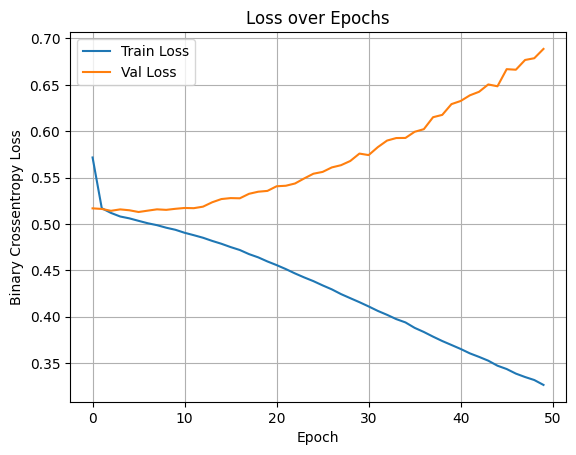

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("Loss over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Binary Crossentropy Loss")
plt.legend()
plt.grid(True)
plt.show()


# Thanks! Since the MLP’s average accuracy is still around 0.70, and your training loss is improving while validation loss increases, it's a sign of overfitting. Now, we’ll shift to a more powerful architecture:

#  1. Create Sequence Windows (e.g., 5 steps → 1 step)


In [ ]:

import numpy as np

def create_sequences(data, window_size=5):
    X_seq, y_seq = [], []
    for i in range(len(data) - window_size):
        X_seq.append(data[i:i+window_size])     # 5 rows
        y_seq.append(data[i+window_size])       # next row
    return np.array(X_seq), np.array(y_seq)

# Apply to original DataFrame
X_seq, y_seq = create_sequences(df.values, window_size=5)

print(f"X shape: {X_seq.shape} | y shape: {y_seq.shape}")
# Should be (N, 5, 35) and (N, 35)


X shape: (2233, 5, 35) | y shape: (2233, 35)


# 2. Build the LSTM Model

In [ ]:
# 2. Build the LSTM Model

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Build LSTM model
model_lstm = Sequential([
    LSTM(128, activation='tanh', input_shape=(5, 35), return_sequences=False),
    Dense(64, activation='relu'),
    Dense(35, activation='sigmoid')
])

model_lstm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
# Train/test split
from sklearn.model_selection import train_test_split
X_train_seq, X_test_seq, y_train_seq, y_test_seq = train_test_split(X_seq, y_seq, test_size=0.2, random_state=42)

# Fit model
history_lstm = model_lstm.fit(X_train_seq, y_train_seq, epochs=50, batch_size=32, validation_split=0.1, verbose=1)


Epoch 1/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - accuracy: 0.2071 - loss: 0.6318 - val_accuracy: 0.9944 - val_loss: 0.5212
Epoch 2/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9944 - loss: 0.5212 - val_accuracy: 0.9944 - val_loss: 0.5179
Epoch 3/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9885 - loss: 0.5110 - val_accuracy: 0.9609 - val_loss: 0.5122
Epoch 4/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9211 - loss: 0.5086 - val_accuracy: 0.9888 - val_loss: 0.5087
Epoch 5/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9526 - loss: 0.5056 - val_accuracy: 0.9888 - val_loss: 0.5079
Epoch 6/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9464 - loss: 0.5026 - val_accuracy: 0.9497 - val_loss: 0.5068
Epoch 7/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9354 - loss: 0.5023 - val_accuracy: 0.9777 - val_loss: 0.5058
Epoch 8/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9252 - loss: 0.5007 - val_accuracy: 0.9665 - v

# 4. Evaluate Performance Per Bit

In [ ]:
# 4. Evaluate Performance Per Bit

# Predict
y_pred_seq = model_lstm.predict(X_test_seq)
y_pred_binary_seq = (y_pred_seq > 0.5).astype(int)

# Per-bit accuracy
from sklearn.metrics import accuracy_score
bit_accuracies_lstm = [accuracy_score(y_test_seq[:, i], y_pred_binary_seq[:, i]) for i in range(35)]

# Report
for i, acc in enumerate(bit_accuracies_lstm):
    print(f"Bit_{i+1:2d}: Accuracy = {acc:.4f}")

print("\n🌟 LSTM Average Accuracy across 35 bits:", np.mean(bit_accuracies_lstm))


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Bit_ 1: Accuracy = 1.0000
Bit_ 2: Accuracy = 0.9396
Bit_ 3: Accuracy = 0.8837
Bit_ 4: Accuracy = 0.8747
Bit_ 5: Accuracy = 0.7830
Bit_ 6: Accuracy = 0.7427
Bit_ 7: Accuracy = 0.7047
Bit_ 8: Accuracy = 0.7517
Bit_ 9: Accuracy = 0.7248
Bit_10: Accuracy = 0.5928
Bit_11: Accuracy = 0.5839
Bit_12: Accuracy = 0.5839
Bit_13: Accuracy = 0.4989
Bit_14: Accuracy = 0.5257
Bit_15: Accuracy = 0.5257
Bit_16: Accuracy = 0.5973
Bit_17: Accuracy = 0.5145
Bit_18: Accuracy = 0.5302
Bit_19: Accuracy = 0.5749
Bit_20: Accuracy = 0.6152
Bit_21: Accuracy = 0.7136
Bit_22: Accuracy = 0.6823
Bit_23: Accuracy = 0.6980
Bit_24: Accuracy = 0.6846
Bit_25: Accuracy = 0.7226
Bit_26: Accuracy = 0.7539
Bit_27: Accuracy = 0.7450
Bit_28: Accuracy = 0.7293
Bit_29: Accuracy = 0.7673
Bit_30: Accuracy = 0.7472
Bit_31: Accuracy = 0.8098
Bit_32: Accuracy = 0.8456
Bit_33: Accuracy = 0.8300
Bit_34: Accuracy = 0.8121
Bit_35: Accuracy = 0.9060

🌟 LSTM Average Accuracy across 35 bits: 0.7141578

# ✅ Recommended Actions to Boost Accuracy


In [ ]:
X_seq, y_seq = create_sequences(df.values, window_size=10)


# 2. Switch to a Bidirectional LSTM

In [ ]:
  from tensorflow.keras.layers import Bidirectional

model_lstm = Sequential([
    Bidirectional(LSTM(128, return_sequences=False), input_shape=(10, 35)),
    Dense(64, activation='relu'),
    Dense(35, activation='sigmoid')
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


# 3. Evaluate Beyond Accuracy

In [ ]:


from sklearn.metrics import precision_score, recall_score, f1_score

for i in range(35):
    print(f"Bit_{i+1:2d}: Precision = {precision_score(y_test_seq[:, i], y_pred_binary_seq[:, i]):.3f} | Recall = {recall_score(y_test_seq[:, i], y_pred_binary_seq[:, i]):.3f} | F1 = {f1_score(y_test_seq[:, i], y_pred_binary_seq[:, i]):.3f}")


Bit_ 1: Precision = 1.000 | Recall = 1.000 | F1 = 1.000
Bit_ 2: Precision = 0.944 | Recall = 0.995 | F1 = 0.969
Bit_ 3: Precision = 0.888 | Recall = 0.995 | F1 = 0.938
Bit_ 4: Precision = 0.881 | Recall = 0.992 | F1 = 0.933
Bit_ 5: Precision = 0.846 | Recall = 0.899 | F1 = 0.872
Bit_ 6: Precision = 0.801 | Recall = 0.898 | F1 = 0.846
Bit_ 7: Precision = 0.750 | Recall = 0.907 | F1 = 0.821
Bit_ 8: Precision = 0.827 | Recall = 0.875 | F1 = 0.850
Bit_ 9: Precision = 0.789 | Recall = 0.862 | F1 = 0.824
Bit_10: Precision = 0.668 | Recall = 0.719 | F1 = 0.693
Bit_11: Precision = 0.650 | Recall = 0.674 | F1 = 0.662
Bit_12: Precision = 0.612 | Recall = 0.741 | F1 = 0.670
Bit_13: Precision = 0.549 | Recall = 0.598 | F1 = 0.573
Bit_14: Precision = 0.567 | Recall = 0.714 | F1 = 0.632
Bit_15: Precision = 0.550 | Recall = 0.601 | F1 = 0.574
Bit_16: Precision = 0.479 | Recall = 0.529 | F1 = 0.503
Bit_17: Precision = 0.403 | Recall = 0.469 | F1 = 0.433
Bit_18: Precision = 0.444 | Recall = 0.352 | F1 

5. Check Bit Entropy or Flip Rates
Use this to understand which bits are predictable.

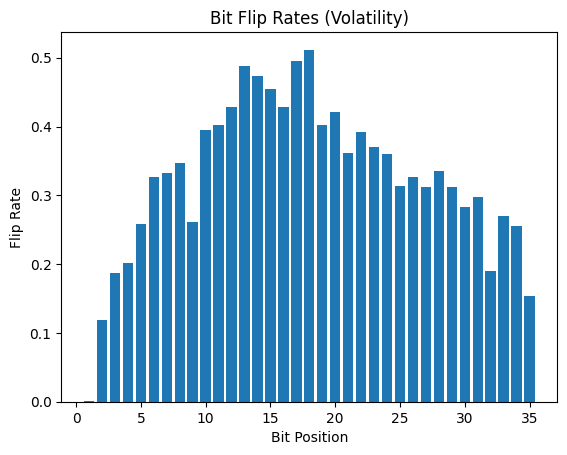

In [ ]:
import matplotlib.pyplot as plt

flip_rates = (df != df.shift(1)).mean()  # bit-wise change rate
plt.bar(range(1, 36), flip_rates)
plt.title("Bit Flip Rates (Volatility)")
plt.xlabel("Bit Position")
plt.ylabel("Flip Rate")
plt.show()


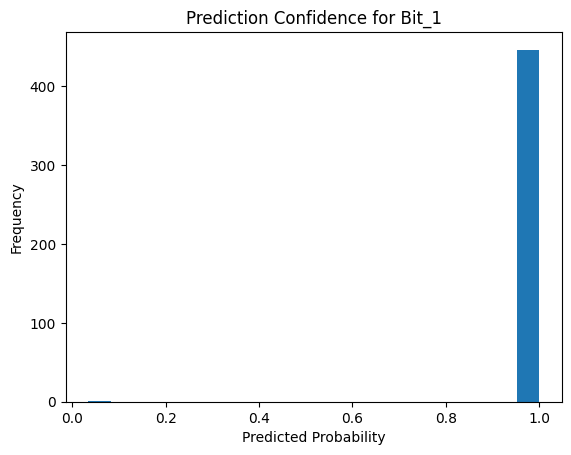

In [ ]:
import matplotlib.pyplot as plt

# Example: confidence histogram for one bit
bit_probs = y_pred_seq[:, 0]  # Probabilities for Bit_1
plt.hist(bit_probs, bins=20)
plt.title("Prediction Confidence for Bit_1")
plt.xlabel("Predicted Probability")
plt.ylabel("Frequency")
plt.show()


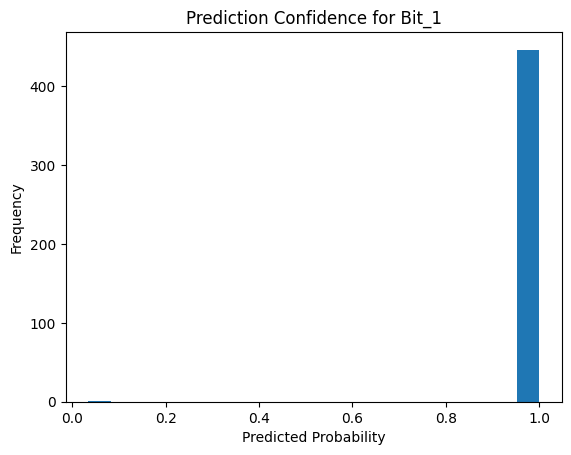

In [ ]:
import matplotlib.pyplot as plt

# Example: confidence histogram for one bit
bit_probs = y_pred_seq[:, 0]  # Probabilities for Bit_1
plt.hist(bit_probs, bins=20)
plt.title("Prediction Confidence for Bit_1")
plt.xlabel("Predicted Probability")
plt.ylabel("Frequency")
plt.show()


In [ ]:
avg_confidence = y_pred_seq.mean(axis=0)
for i, conf in enumerate(avg_confidence):
    print(f"Bit_{i+1}: Avg Confidence = {conf:.3f}")


Bit_1: Avg Confidence = 0.998
Bit_2: Avg Confidence = 0.962
Bit_3: Avg Confidence = 0.918
Bit_4: Avg Confidence = 0.898
Bit_5: Avg Confidence = 0.810
Bit_6: Avg Confidence = 0.778
Bit_7: Avg Confidence = 0.790
Bit_8: Avg Confidence = 0.763
Bit_9: Avg Confidence = 0.762
Bit_10: Avg Confidence = 0.634
Bit_11: Avg Confidence = 0.612
Bit_12: Avg Confidence = 0.619
Bit_13: Avg Confidence = 0.586
Bit_14: Avg Confidence = 0.614
Bit_15: Avg Confidence = 0.556
Bit_16: Avg Confidence = 0.438
Bit_17: Avg Confidence = 0.463
Bit_18: Avg Confidence = 0.402
Bit_19: Avg Confidence = 0.333
Bit_20: Avg Confidence = 0.297
Bit_21: Avg Confidence = 0.245
Bit_22: Avg Confidence = 0.243
Bit_23: Avg Confidence = 0.236
Bit_24: Avg Confidence = 0.217
Bit_25: Avg Confidence = 0.228
Bit_26: Avg Confidence = 0.186
Bit_27: Avg Confidence = 0.196
Bit_28: Avg Confidence = 0.225
Bit_29: Avg Confidence = 0.213
Bit_30: Avg Confidence = 0.214
Bit_31: Avg Confidence = 0.196
Bit_32: Avg Confidence = 0.102
Bit_33: Avg Confi